# Temperature Forecast Project using ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv'
data = pd.read_csv(url)
print(data.head())


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1628\3012233497.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


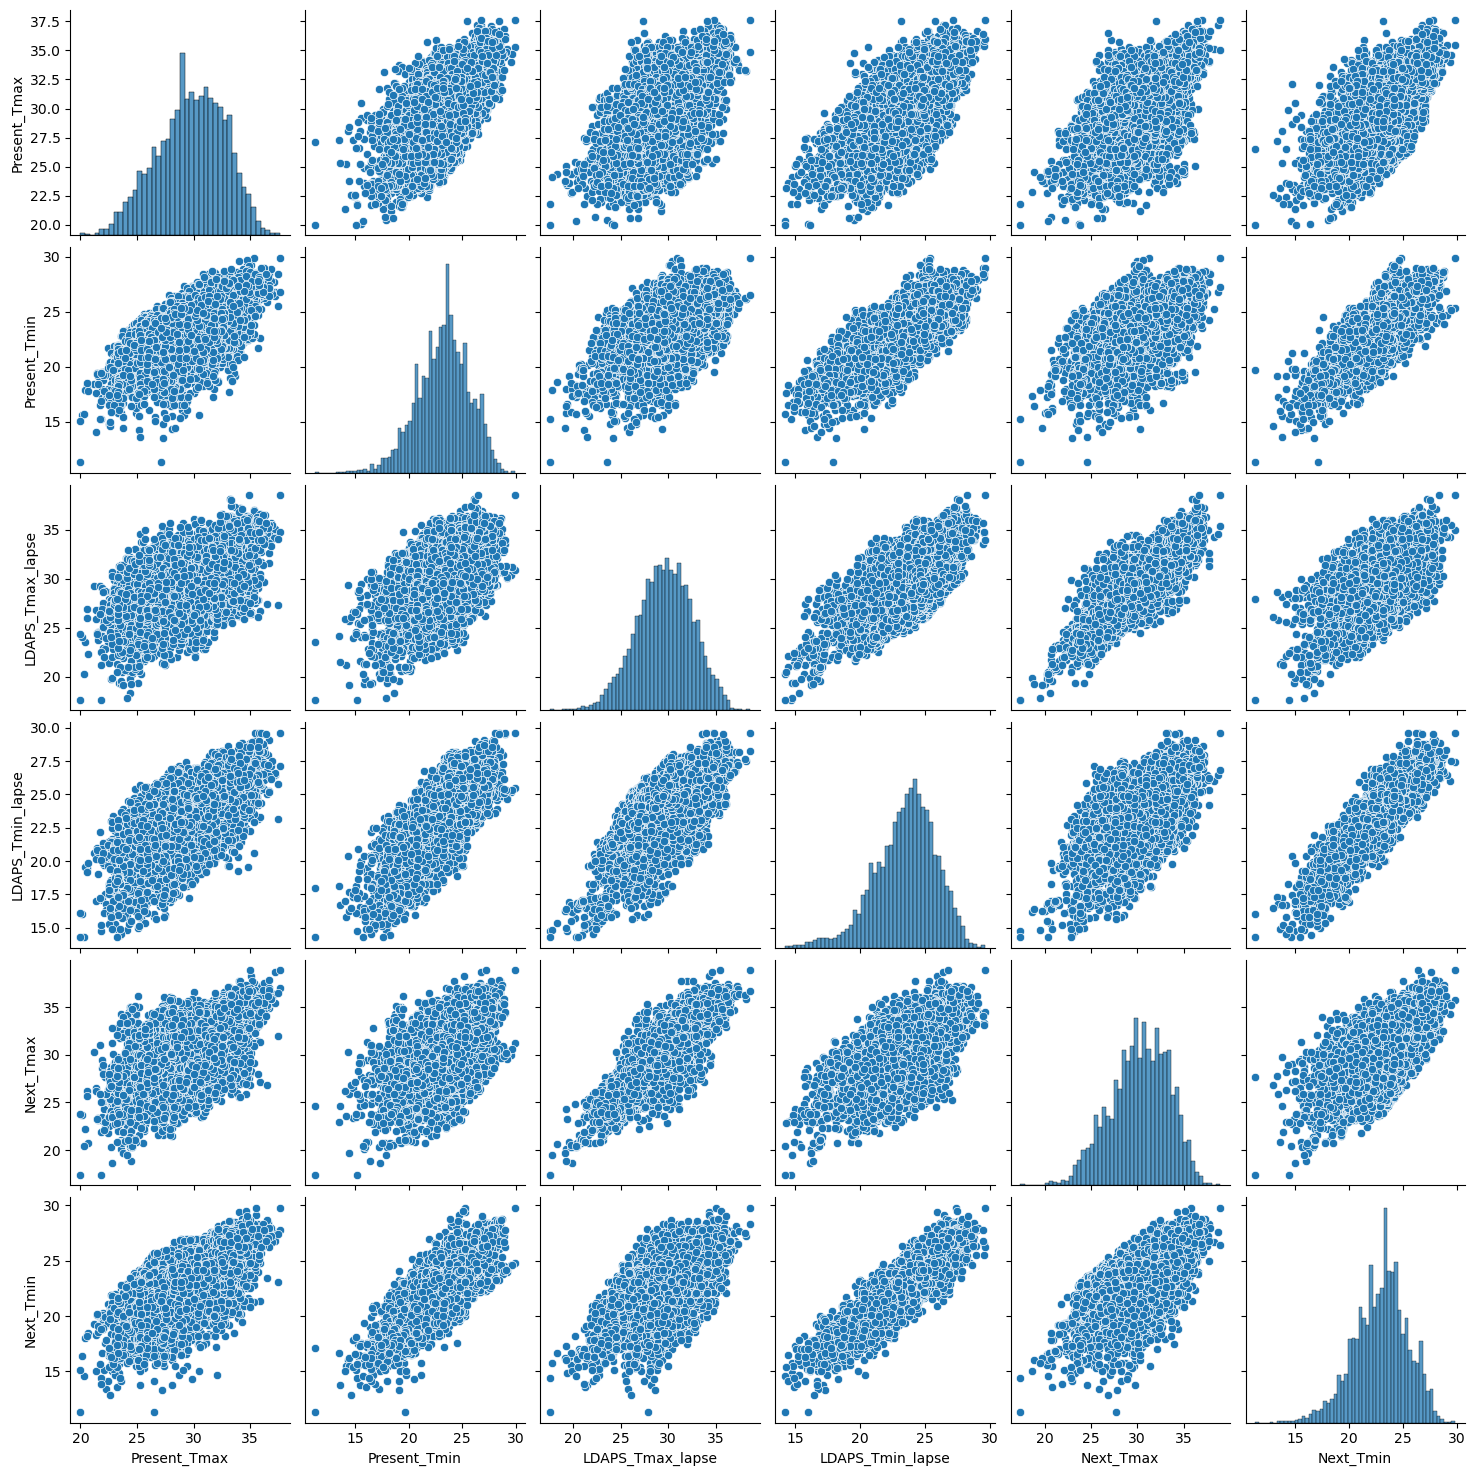

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1628\3012233497.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


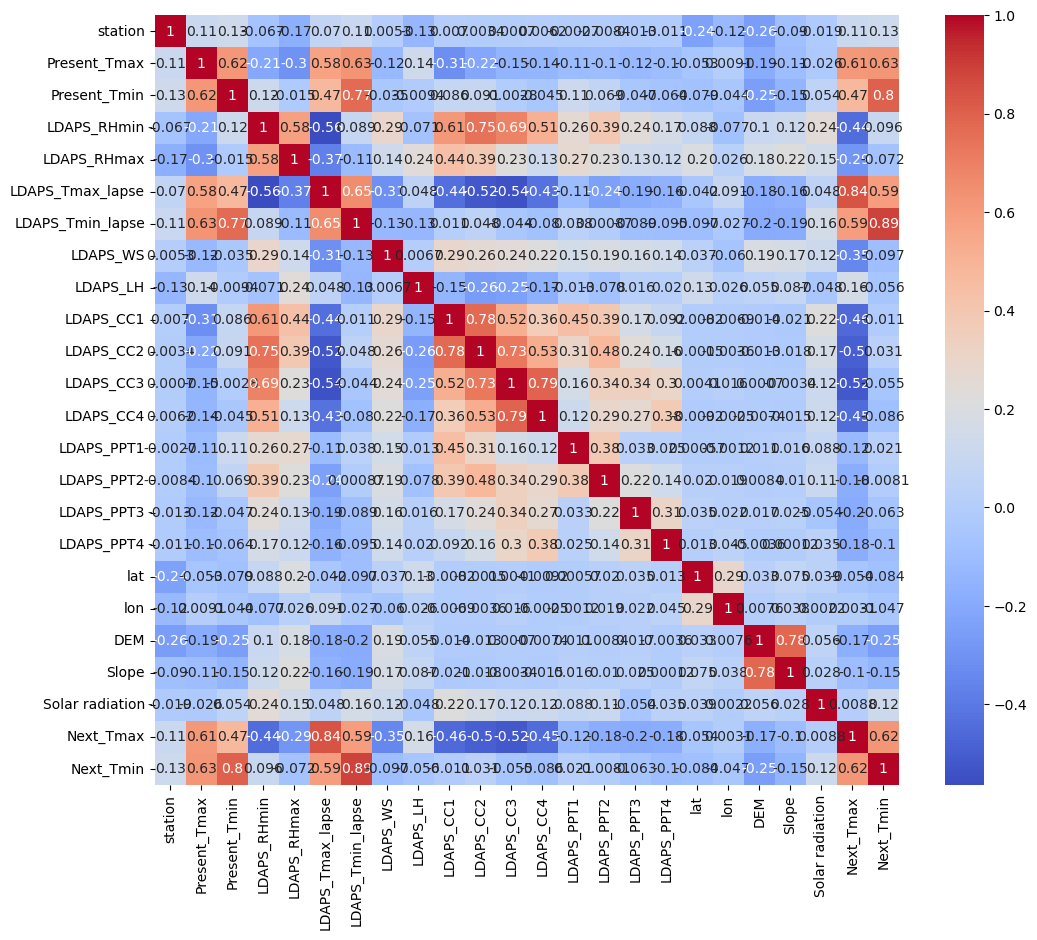

In [2]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Visualize relationships
sns.pairplot(data[['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'Next_Tmax', 'Next_Tmin']])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
# Check data types of columns
print(data.dtypes)


station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object


In [7]:
# Selecting only numerical columns to scale (assuming all columns except 'Date' are numerical)
numerical_cols = data.drop(columns=['Date']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows after scaling
print(data.head())


KeyError: "['Date'] not found in axis"

In [8]:
# Print column names to check for 'Date'
print(data.columns)


Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [15]:
X = data.drop(columns=['Next_Tmax', 'Next_Tmin'])  # Features excluding targets
y_max = data['Next_Tmax']  # Target for next-day maximum temperature
y_min = data['Next_Tmin']  # Target for next-day minimum temperature

 

In [16]:
# Identify numerical columns
numerical_cols = X.columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [17]:
# Split for Next_Tmax prediction
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Split for Next_Tmin prediction
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the RandomForestRegressor
regressor_max = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model for Next_Tmax prediction
regressor_max.fit(X_train_max, y_train_max)

# Predict on test set
y_pred_max = regressor_max.predict(X_test_max)

# Evaluate the model
print("Next_Tmax Model Metrics:")
print(f'MAE: {mean_absolute_error(y_test_max, y_pred_max)}')
print(f'MSE: {mean_squared_error(y_test_max, y_pred_max)}')
print(f'RMSE: {mean_squared_error(y_test_max, y_pred_max, squared=False)}')


ValueError: Input y contains NaN.

In [19]:
# Check for NaN values in y_max (Next_Tmax)
print("NaN values in y_max:", y_max.isnull().sum())

# Check for NaN values in y_min (Next_Tmin)
print("NaN values in y_min:", y_min.isnull().sum())

# Remove rows with NaN values in y_max and y_min
nan_indices_max = y_max[y_max.isnull()].index
nan_indices_min = y_min[y_min.isnull()].index

nan_indices = nan_indices_max.union(nan_indices_min)

X = X.drop(index=nan_indices)
y_max = y_max.drop(index=nan_indices)
y_min = y_min.drop(index=nan_indices)

# Now, proceed with splitting into training and testing sets


NaN values in y_max: 27
NaN values in y_min: 27


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Split for Next_Tmax prediction
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Split for Next_Tmin prediction
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
regressor_max = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model for Next_Tmax prediction
regressor_max.fit(X_train_max, y_train_max)

# Predict on test set
y_pred_max = regressor_max.predict(X_test_max)

# Evaluate the model
print("Next_Tmax Model Metrics:")
print(f'MAE: {mean_absolute_error(y_test_max, y_pred_max)}')
print(f'MSE: {mean_squared_error(y_test_max, y_pred_max)}')
print(f'RMSE: {mean_squared_error(y_test_max, y_pred_max, squared=False)}')

# Similarly, train and evaluate the model for Next_Tmin prediction
regressor_min = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_min.fit(X_train_min, y_train_min)
y_pred_min = regressor_min.predict(X_test_min)

print("\nNext_Tmin Model Metrics:")
print(f'MAE: {mean_absolute_error(y_test_min, y_pred_min)}')
print(f'MSE: {mean_squared_error(y_test_min, y_pred_min)}')
print(f'RMSE: {mean_squared_error(y_test_min, y_pred_min, squared=False)}')


Next_Tmax Model Metrics:
MAE: 0.7212181229773462
MSE: 0.9593550990291257
RMSE: 0.9794667421761322


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Next_Tmin Model Metrics:
MAE: 0.57046213592233
MSE: 0.5801132241294499
RMSE: 0.7616516422416811


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Next_Tmax model
cv_scores_max = cross_val_score(regressor_max, X, y_max, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation MAE scores for Next_Tmax:")
print(-cv_scores_max)

# Cross-validation for Next_Tmin model
cv_scores_min = cross_val_score(regressor_min, X, y_min, cv=5, scoring='neg_mean_absolute_error')
print("\nCross-validation MAE scores for Next_Tmin:")
print(-cv_scores_min)


Cross-validation MAE scores for Next_Tmax:
[1.1311534  1.25806667 1.19193592 1.34297929 1.40954304]

Cross-validation MAE scores for Next_Tmin:
[0.80581683 0.88209903 0.79258835 0.88083625 0.70348544]


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Next_Tmax model
grid_search_max = GridSearchCV(regressor_max, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_max.fit(X, y_max)

print("Best parameters for Next_Tmax:")
print(grid_search_max.best_params_)
print("Best MAE score for Next_Tmax:")
print(-grid_search_max.best_score_)

# Perform GridSearchCV for Next_Tmin model
grid_search_min = GridSearchCV(regressor_min, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_min.fit(X, y_min)

print("\nBest parameters for Next_Tmin:")
print(grid_search_min.best_params_)
print("Best MAE score for Next_Tmin:")
print(-grid_search_min.best_score_)


Best parameters for Next_Tmax:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best MAE score for Next_Tmax:
1.2607422629565548

Best parameters for Next_Tmin:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best MAE score for Next_Tmin:
0.8103656046117678


In [23]:
import joblib

# Save the best models
best_regressor_max = grid_search_max.best_estimator_
joblib.dump(best_regressor_max, 'best_model_next_tmax.pkl')

best_regressor_min = grid_search_min.best_estimator_
joblib.dump(best_regressor_min, 'best_model_next_tmin.pkl')

print("\nBest models saved successfully.")



Best models saved successfully.


Hyperparameter tuning using GridSearchCV further refines the model by exploring different combinations of hyperparameters (such as n_estimators, max_depth, min_samples_split, min_samples_leaf for Random Forest Regressor).
The best performing model is selected based on the combination of hyperparameters that yield the lowest MAE score during the grid search process.
